In [1]:
#--------------Importing Libraries----------------#
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from ReliefF import ReliefF

from tabulate import tabulate
from tabulate import _table_formats, tabulate


In [7]:
#----------------Defining Functions-------------------#
def Accuracy_rate(y,y_estimated):
    count=0
    for i in range(len(y_estimated)):
        if y_estimated[i]== y[i]:
            count= count+1
    miscl_rate = count/len(y_estimated)*100
    return miscl_rate

def root_mean_square(y_estimated):
    rms = np.sqrt(np.mean((np.array(y_estimated)-0.5)**2))
    return rms

def discard_outliers(name):
    u = np.median(df[name])
    s = np.std(df[name])
    filtered= [e for e in (df[name]) if (u - 2 * s < e < u + 2 * s)]
    return filtered


def get_boolean_col(name, dataset):
    u = np.median(dataset[name])
    dataset[name] = (df[name] > 1000).astype(int)
    #return filtered

In [8]:
#-----------------Reading Dataset--------------------#
df = pd.read_csv("OnlineNewsPopularity.csv")
print("Size of Original dataset")
print(df.shape)


#--------------Dataset Preprocessing-----------------#
df.columns = [i.strip() for i in df.columns]  # space removing 

#dropping those articles which time delta is less than 1 month
df_pre_1 = df.drop(df[df.timedelta < 30].index)
print("Size of dataset after removing recent articles")
print(df_pre_1.shape)


#dropping the non-prediction features
df_pre_2 = df_pre_1.drop(['url',df.keys()[1]], axis=1) #Dataset 2 (with outlier, without PCA)
print("Size of dataset after removing non-prediction features")
print(df_pre_2.shape)


#Removing outliers from the dataset
df_pre_3 = df_pre_2[df_pre_2['shares']<26900]   #Dataset 4 (without outlier, without PCA)
print("Size of dataset after removing outliers from shares column")
print(df_pre_3.shape)

get_boolean_col('shares', df_pre_2)
get_boolean_col('shares', df_pre_3)
#print('Predict Column')
#print(df_pre_3['shares'])

#Data normalization of numeric features
scaler = MinMaxScaler()
numerical = ['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs','num_videos',\
            'average_token_length','num_keywords','self_reference_min_shares','self_reference_max_shares',\
             'self_reference_avg_sharess']
df_pre_3[numerical] = scaler.fit_transform(df_pre_3[numerical])
df_pre_2[numerical] = scaler.fit_transform(df_pre_2[numerical])

Size of Original dataset
(39644, 61)
Size of dataset after removing recent articles
(38457, 61)
Size of dataset after removing non-prediction features
(38457, 59)
Size of dataset after removing outliers from shares column
(37964, 59)


Dataset - 1
---------------------------------------
 
Accuracy Rate of Random Forest Classifier
68.33073322932918
---------------------------------------
 
Accuracy Rate of Ada Boost Classifier
71.60686427457098
---------------------------------------
 
Accuracy Rate of KNN Classifier
68.23972958918357
---------------------------------------
 
Accuracy Rate of Neural Network Classifier
31.409256370254813
 
Accuracy List
[68.33073322932918, 71.60686427457098, 68.23972958918357, 31.409256370254813]
 


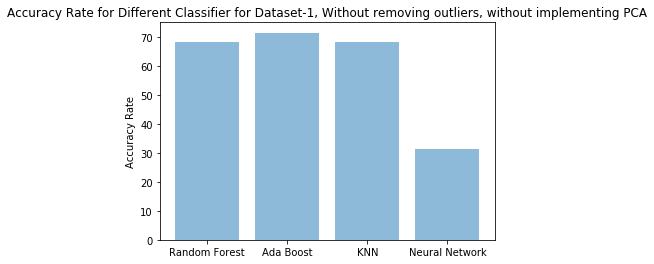

In [9]:
#Working With DataSet-1(Wihtout Removing Outlier, wihtout implementing PCA)

#-----------Dataset 4 Splitting------------------#
train, test = train_test_split(df_pre_2, test_size=0.20, random_state=42)
X_train = train.drop(['shares'], axis=1)  
y_train = train['shares']
X_test = test.drop(['shares'], axis=1)  
y_test = test['shares']

#---------Implementing Classification Techniques------#
Accuracy_list=[]
y_test_list = y_test.values.flatten()
print("Dataset - 1")
print("---------------------------------------")
print(" ")

#Random Forest Classifier
RF_clf = RandomForestClassifier(n_estimators=10, random_state=0)
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)
acc_rate = Accuracy_rate(y_test_list, y_pred)
print("Accuracy Rate of Random Forest Classifier")
print(acc_rate)
Accuracy_list.append(acc_rate)
print("---------------------------------------")
print(" ")


#Ada Boost Classifier
AD_clf = AdaBoostClassifier(random_state=0,learning_rate=0.5,n_estimators=100)
AD_clf.fit(X_train, y_train)
y_pred = AD_clf.predict(X_test)
acc_rate = Accuracy_rate(y_test_list, y_pred)
#lin_rmse = np.sqrt(lin_mse)
print("Accuracy Rate of Ada Boost Classifier")
print(acc_rate)
Accuracy_list.append(acc_rate)
print("---------------------------------------")
print(" ")


#KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=80)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
acc_rate = Accuracy_rate(y_test_list, y_pred)
print("Accuracy Rate of KNN Classifier")
print(acc_rate)
Accuracy_list.append(acc_rate)
print("---------------------------------------")
print(" ")


#Implementing Neural Network 
nn_clf = MLPClassifier(solver='lbfgs', alpha=0.001, hidden_layer_sizes=(3, 10), random_state=1)
nn_clf.fit(X_train, y_train)
y_pred = nn_clf.predict(X_test)
acc_rate = Accuracy_rate(y_test_list, y_pred)
print("Accuracy Rate of Neural Network Classifier")
print(acc_rate)
Accuracy_list.append(acc_rate)

print(' ')
print("Accuracy List")
print(Accuracy_list)
print(' ')

model_list = ['Random Forest', 'Ada Boost', 'KNN', 'Neural Network']
y_pos = np.arange(0, 4)
x_rate = Accuracy_list[0:4]  
plt.bar(y_pos, x_rate, align='center', alpha=0.5)
plt.xticks(y_pos, model_list)
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rate for Different Classifier for Dataset-1, Without removing outliers, without implementing PCA') 
plt.show() 



Dataset - 2
---------------------------------------
 
Accuracy Rate of Random Forest Classifier
68.16804951929409
---------------------------------------
 
Accuracy Rate of Ada Boost Classifier
72.43513762676149
---------------------------------------
 
Accuracy Rate of KNN Classifier
68.0363492690636
---------------------------------------
 
Accuracy Rate of Neural Network Classifier
31.80561043065982
---------------------------------------
 
 
Accuracy List
[68.16804951929409, 72.43513762676149, 68.0363492690636, 31.80561043065982]
 


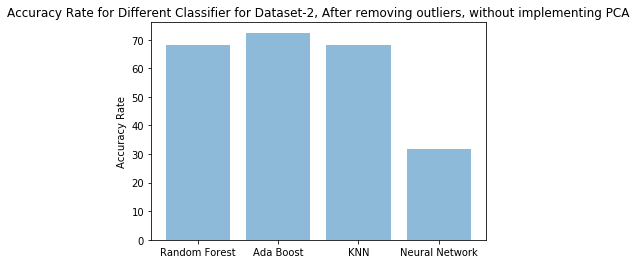

In [10]:
#-----------Dataset 2 Splitting------------------#
print("Dataset - 2")
print("---------------------------------------")
print(" ")

train, test = train_test_split(df_pre_3, test_size=0.20, random_state=42)
X_train = train.drop(['shares'], axis=1)  
y_train = train['shares']
X_test = test.drop(['shares'], axis=1)  
y_test = test['shares']

#---------Implementing Classification Techniques------#
Accuracy_list=[]
y_test_list = y_test.values.flatten()

#Random Forest Classifier
RF_clf = RandomForestClassifier(n_estimators=10, random_state=0)
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)
acc_rate = Accuracy_rate(y_test_list, y_pred)
print("Accuracy Rate of Random Forest Classifier")
print(acc_rate)
Accuracy_list.append(acc_rate)
print("---------------------------------------")
print(" ")

#Ada Boost Classifier
AD_clf = AdaBoostClassifier(random_state=0,learning_rate=0.5,n_estimators=300)
AD_clf.fit(X_train, y_train)
y_pred = AD_clf.predict(X_test)
acc_rate = Accuracy_rate(y_test_list, y_pred)
#lin_rmse = np.sqrt(lin_mse)
print("Accuracy Rate of Ada Boost Classifier")
print(acc_rate)
Accuracy_list.append(acc_rate)
print("---------------------------------------")
print(" ")

#KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=80)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
acc_rate = Accuracy_rate(y_test_list, y_pred)
print("Accuracy Rate of KNN Classifier")
print(acc_rate)
Accuracy_list.append(acc_rate)
print("---------------------------------------")
print(" ")

#Implementing Neural Network 
nn_clf = MLPClassifier(solver='lbfgs', alpha=0.001, hidden_layer_sizes=(3, 10), random_state=1)
nn_clf.fit(X_train, y_train)
y_pred = nn_clf.predict(X_test)
acc_rate = Accuracy_rate(y_test_list, y_pred)
print("Accuracy Rate of Neural Network Classifier")
print(acc_rate)
Accuracy_list.append(acc_rate)
print("---------------------------------------")
print(" ")

print(' ')
print("Accuracy List")
print(Accuracy_list)
print(' ')

model_list = ['Random Forest', 'Ada Boost', 'KNN', 'Neural Network']
y_pos = np.arange(0, 4)
x_rate = Accuracy_list[0:4]  
plt.bar(y_pos, x_rate, align='center', alpha=0.5)
plt.xticks(y_pos, model_list)
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rate for Different Classifier for Dataset-2, After removing outliers, without implementing PCA') 
plt.show() 



Dataset - 3
---------------------------------------
 
Accuracy Rate of Random Forest Classifier
62.675507020280804
---------------------------------------
 
Accuracy Rate of Ada Boost Classifier
68.59074362974519
---------------------------------------
 
Accuracy Rate of KNN Classifier
68.14872594903795
---------------------------------------
 
Accuracy Rate of Neural Network Classifier
41.978679147165884
 
Accuracy List
[62.675507020280804, 68.59074362974519, 68.14872594903795, 41.978679147165884]
 


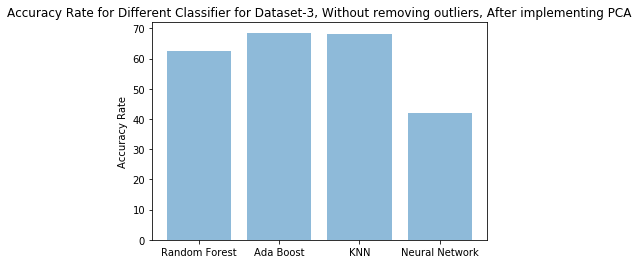

In [12]:
#-----------Dataset 3 Splitting------------------#
train, test = train_test_split(df_pre_2, test_size=0.20, random_state=42)
X_train_raw = train.drop(['shares'], axis=1)  
y_train = train['shares']
X_test_raw = test.drop(['shares'], axis=1)  
y_test = test['shares']

#applying PCA

pca = PCA(n_components=5)
pca.fit(X_train_raw)
X_train_pca = pca.transform(X_train_raw)
X_test_pca = pca.transform(X_test_raw)
X_train = pd.DataFrame(X_train_pca)
X_test = pd.DataFrame(X_test_pca)

#---------Implementing Classification Techniques------#
Accuracy_list=[]
y_test_list = y_test.values.flatten()
print("Dataset - 3")
print("---------------------------------------")
print(" ")
#Random Forest Classifier
RF_clf = RandomForestClassifier(n_estimators=10, random_state=0)
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)
acc_rate = Accuracy_rate(y_test_list, y_pred)
print("Accuracy Rate of Random Forest Classifier")
print(acc_rate)
Accuracy_list.append(acc_rate)
print("---------------------------------------")
print(" ")


#Ada Boost Classifier
AD_clf = AdaBoostClassifier(random_state=0,learning_rate=0.5,n_estimators=300)
AD_clf.fit(X_train, y_train)
y_pred = AD_clf.predict(X_test)
acc_rate = Accuracy_rate(y_test_list, y_pred)
#lin_rmse = np.sqrt(lin_mse)
print("Accuracy Rate of Ada Boost Classifier")
print(acc_rate)
Accuracy_list.append(acc_rate)
print("---------------------------------------")
print(" ")


#KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=80)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
acc_rate = Accuracy_rate(y_test_list, y_pred)
print("Accuracy Rate of KNN Classifier")
print(acc_rate)
Accuracy_list.append(acc_rate)
print("---------------------------------------")
print(" ")


#Implementing Neural Network 
nn_clf = MLPClassifier(solver='lbfgs', alpha=0.001, hidden_layer_sizes=(3, 10), random_state=1)
nn_clf.fit(X_train, y_train)
y_pred = nn_clf.predict(X_test)
acc_rate = Accuracy_rate(y_test_list, y_pred)
print("Accuracy Rate of Neural Network Classifier")
print(acc_rate)
Accuracy_list.append(acc_rate)

print(' ')
print("Accuracy List")
print(Accuracy_list)
print(' ')

model_list = ['Random Forest', 'Ada Boost', 'KNN', 'Neural Network']
y_pos = np.arange(0, 4)
x_rate = Accuracy_list[0:4]  
plt.bar(y_pos, x_rate, align='center', alpha=0.5)
plt.xticks(y_pos, model_list)
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rate for Different Classifier for Dataset-3, Without removing outliers, After implementing PCA') 
plt.show() 



Dataset - 4
---------------------------------------
 
Accuracy Rate of Random Forest Classifier
63.281970235743444
---------------------------------------
 
Accuracy Rate of Ada Boost Classifier
68.18121954431713
---------------------------------------
 
Accuracy Rate of KNN Classifier
68.10219939417885
---------------------------------------
 
Accuracy Rate of Neural Network Classifier
43.07915185038851
 
Accuracy List
[63.281970235743444, 68.18121954431713, 68.10219939417885, 43.07915185038851]
 


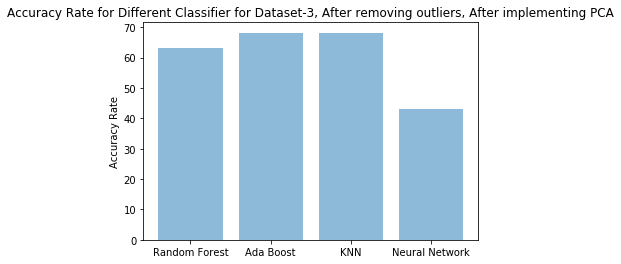

In [13]:
#-----------Dataset 4 Splitting------------------#
train, test = train_test_split(df_pre_3, test_size=0.20, random_state=42)
X_train_raw = train.drop(['shares'], axis=1)  
y_train = train['shares']
X_test_raw = test.drop(['shares'], axis=1)  
y_test = test['shares']

#applying PCA

pca = PCA(n_components=5)
pca.fit(X_train_raw)
X_train_pca = pca.transform(X_train_raw)
X_test_pca = pca.transform(X_test_raw)
X_train = pd.DataFrame(X_train_pca)
X_test = pd.DataFrame(X_test_pca)

#---------Implementing Classification Techniques------#
Accuracy_list=[]
y_test_list = y_test.values.flatten()
print("Dataset - 4")
print("---------------------------------------")
print(" ")
#Random Forest Classifier
RF_clf = RandomForestClassifier(n_estimators=10, random_state=0)
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)
acc_rate = Accuracy_rate(y_test_list, y_pred)
print("Accuracy Rate of Random Forest Classifier")
print(acc_rate)
Accuracy_list.append(acc_rate)
print("---------------------------------------")
print(" ")


#Ada Boost Classifier
AD_clf = AdaBoostClassifier(random_state=0,learning_rate=0.5,n_estimators=300)
AD_clf.fit(X_train, y_train)
y_pred = AD_clf.predict(X_test)
acc_rate = Accuracy_rate(y_test_list, y_pred)
#lin_rmse = np.sqrt(lin_mse)
print("Accuracy Rate of Ada Boost Classifier")
print(acc_rate)
Accuracy_list.append(acc_rate)
print("---------------------------------------")
print(" ")


#KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=80)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
acc_rate = Accuracy_rate(y_test_list, y_pred)
print("Accuracy Rate of KNN Classifier")
print(acc_rate)
Accuracy_list.append(acc_rate)
print("---------------------------------------")
print(" ")


#Implementing Neural Network 
nn_clf = MLPClassifier(solver='lbfgs', alpha=0.001, hidden_layer_sizes=(3, 10), random_state=1)
nn_clf.fit(X_train, y_train)
y_pred = nn_clf.predict(X_test)
acc_rate = Accuracy_rate(y_test_list, y_pred)
print("Accuracy Rate of Neural Network Classifier")
print(acc_rate)
Accuracy_list.append(acc_rate)

print(' ')
print("Accuracy List")
print(Accuracy_list)
print(' ')

model_list = ['Random Forest', 'Ada Boost', 'KNN', 'Neural Network']
y_pos = np.arange(0, 4)
x_rate = Accuracy_list[0:4]  
plt.bar(y_pos, x_rate, align='center', alpha=0.5)
plt.xticks(y_pos, model_list)
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rate for Different Classifier for Dataset-3, After removing outliers, After implementing PCA') 
plt.show() 


Accuracy Rate of Ada Boost Classifier
72.43513762676149
---------------------------------------
 
Accuracy Rate of Ada Boost Classifier After Applying ReliefF Feature selection method
69.70894244699065
---------------------------------------
 
 
Accuracy List
[72.43513762676149, 69.70894244699065]
 


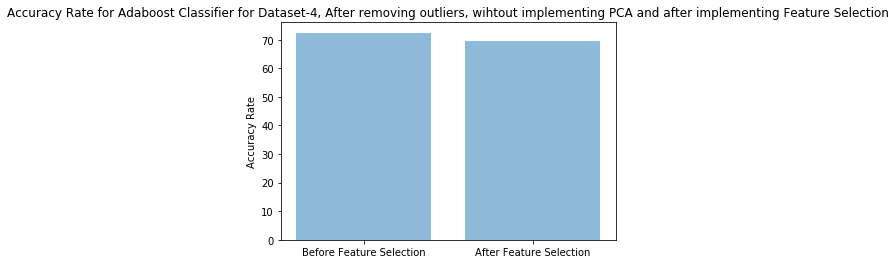

In [23]:
#Implementing Feature Selection Technique

#-----------Dataset 4 Splitting------------------#
train, test = train_test_split(df_pre_3, test_size=0.20, random_state=42)
X_train = train.drop(['shares'], axis=1)  
y_train = train['shares']
X_test = test.drop(['shares'], axis=1)  
y_test = test['shares']

#---------Implementing Classification Techniques------#
Accuracy_list=[]
y_test_list = y_test.values.flatten()

#Ada Boost Classifier
AD_clf = AdaBoostClassifier(random_state=0,learning_rate=0.5,n_estimators=300)
AD_clf.fit(X_train, y_train)
y_pred = AD_clf.predict(X_test)
acc_rate = Accuracy_rate(y_test_list, y_pred)
#lin_rmse = np.sqrt(lin_mse)
print("Accuracy Rate of Ada Boost Classifier")
print(acc_rate)
Accuracy_list.append(acc_rate)
print("---------------------------------------")
print(" ")


#Implementing ReliefF
train, test = train_test_split(df_pre_3, test_size=0.20, random_state=42)
X_train = train.drop(['shares'], axis=1).values  
y_train = train['shares'].values  
X_test = test.drop(['shares'], axis=1).values   
y_test = test['shares'].values  

fs = ReliefF(n_neighbors=50, n_features_to_keep=20)
X_train = fs.fit_transform(X_train, y_train)
X_test_subset = fs.transform(X_test)
#X_train_subset = fs.transform(X_train)
#print(X_train.shape, X_test_subset.shape)


#Ada Boost Classifier
AD_clf = AdaBoostClassifier(random_state=0,learning_rate=0.5,n_estimators=300)
AD_clf.fit(X_train, y_train)
y_pred = AD_clf.predict(X_test_subset)
acc_rate = Accuracy_rate(y_test_list, y_pred)
#lin_rmse = np.sqrt(lin_mse)
print("Accuracy Rate of Ada Boost Classifier After Applying ReliefF Feature selection method")
print(acc_rate)
Accuracy_list.append(acc_rate)
print("---------------------------------------")
print(" ")

print(' ')
print("Accuracy List")
print(Accuracy_list)
print(' ')

model_list = ['Before Feature Selection', 'After Feature Selection']
y_pos = np.arange(0, 2)
x_rate = Accuracy_list[0:2]  
plt.bar(y_pos, x_rate, align='center', alpha=0.5)
plt.xticks(y_pos, model_list)
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rate for Adaboost Classifier for Dataset-4, After removing outliers, wihtout implementing PCA and after implementing Feature Selection') 
plt.show() 
